# Test the CNN model of facial features and face detection

In [1]:
# import packages
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import keras
import tensorflow as tf

from tensorflow.keras.models import load_model

%matplotlib inline

In [2]:
# load the model
model = tf.keras.models.load_model("model.h5")

In [3]:
tests_images_path = './data/tests'

original_image_size = (178,218)
image_size_training = (45,36)

x_ = image_size_training[0]
y_ = image_size_training[1]

x_org = original_image_size[0]
y_org = original_image_size[1]

In [4]:
def predictions_test_model(index):
    path = "{}/image_test ({}).jpg".format(tests_images_path, index)
    img = tf.keras.preprocessing.image.load_img(path ,target_size=(y_,x_,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    points_list = model.predict(img.reshape(1,y_,x_,3)).astype('int')[0]
    
    # converting key points values to the original size
    x_ratio = 1.05 * (original_image_size[0] / image_size_training[0])
    y_ratio = 1.085 * (original_image_size[1] / image_size_training[1])
    """
    In the previous ratios we multiply them by contant to reduce the noise that happened when we rescaled the points in
    the previous training, there is no meaning for these numbers (i just pick them with trails)
    """
    
    points_list[0] = int(points_list[0] * x_ratio)
    points_list[2] = int(points_list[2] * x_ratio)
    points_list[4] = int(points_list[4] * x_ratio)
    points_list[6] = int(points_list[6] * x_ratio)
    points_list[8] = int(points_list[8] * x_ratio)
    
    points_list[1] = int(points_list[1] * y_ratio)
    points_list[3] = int(points_list[3] * y_ratio)
    points_list[5] = int(points_list[5] * y_ratio)
    points_list[7] = int(points_list[7] * y_ratio)
    points_list[9] = int(points_list[9] * y_ratio)
    
    return points_list

In [5]:
# function to plot the image with green box around the faces
def test_image_with_box_plot(index):
    path = "{}/image_test ({}).jpg".format(tests_images_path, index)
    img = tf.keras.preprocessing.image.load_img(path ,target_size=(y_org,x_org,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    test_image = img/255
    
    # predictions of key points on the face
    points_list = predictions_test_model(index)
    
    # face points
    le_x, le_y, re_x, re_y = points_list[0], points_list[1], points_list[2], points_list[3]
    n_x, n_y = points_list[4], points_list[5]
    lm_x, lm_y, rm_x, rm_y = points_list[6], points_list[7], points_list[8], points_list[9]

    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)
    # plot the points on the face
    ax.plot([le_x,re_x,n_x,lm_x,rm_x], [le_y,re_y,n_y,lm_y,rm_y], 'bo-')
    
    # plot the box around the face
    width = abs(le_x-rm_x-60)
    height = abs(le_y-rm_y-75)
    rect = patches.Rectangle((le_x-30, le_y-40), width, height, linewidth=4, edgecolor='g', facecolor='none')
    ax.add_patch(rect);
    return points_list

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


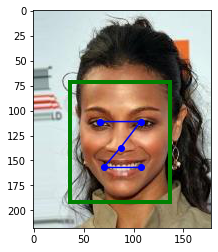

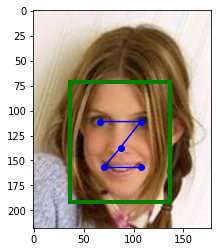

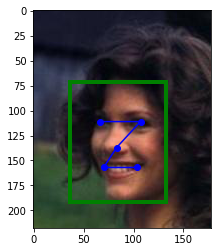

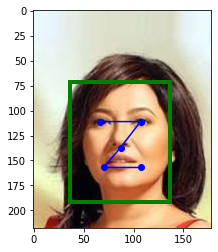

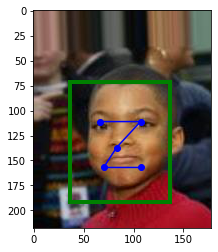

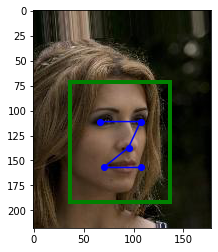

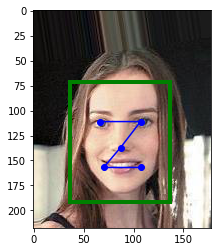

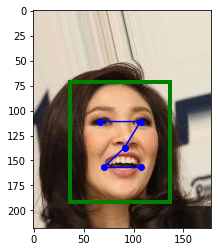

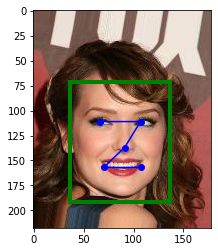

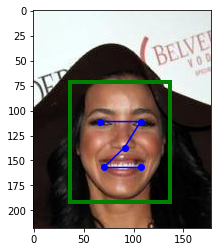

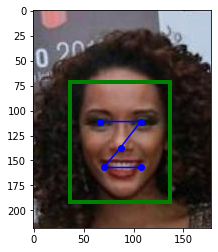

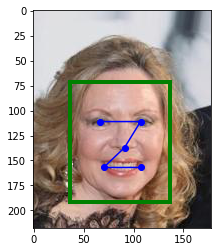

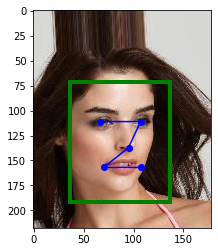

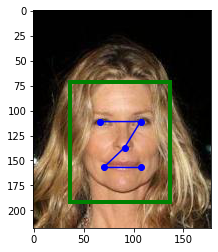

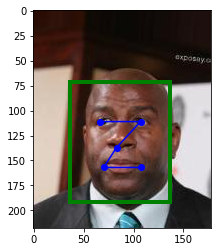

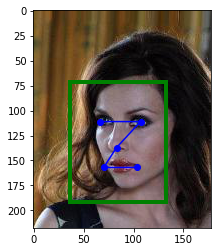

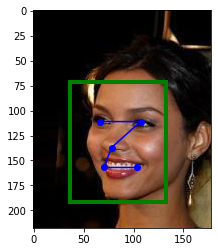

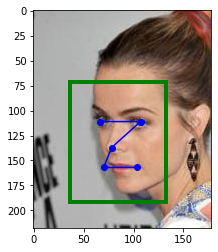

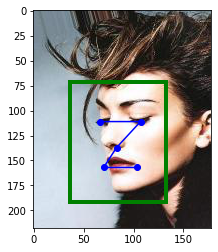

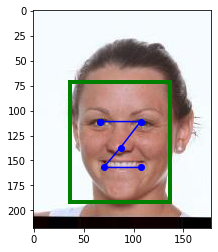

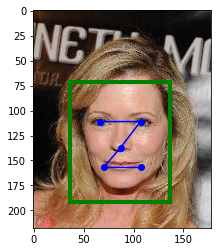

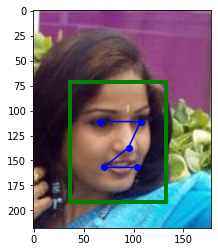

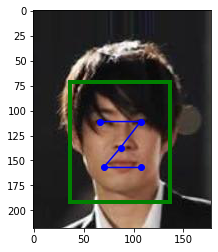

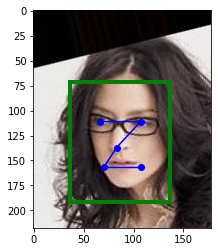

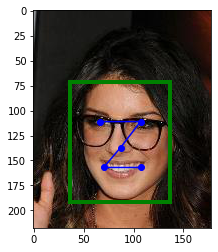

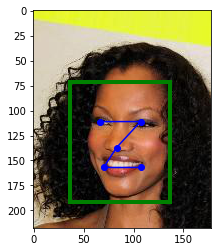

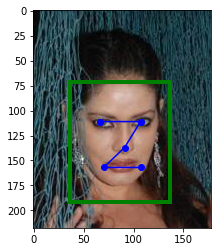

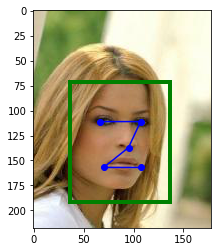

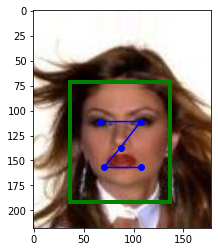

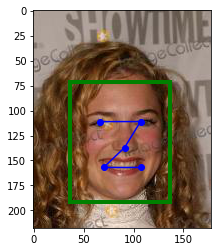

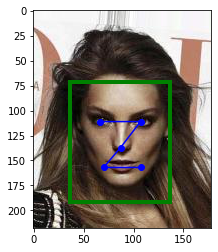

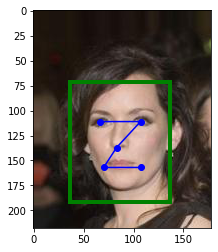

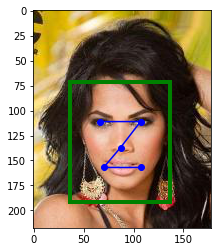

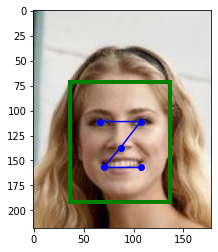

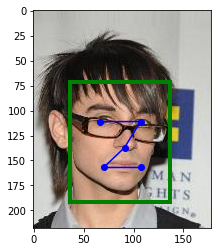

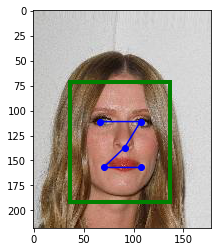

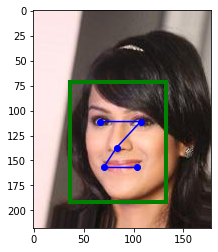

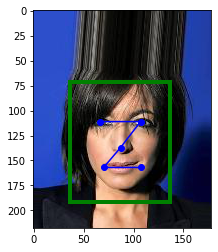

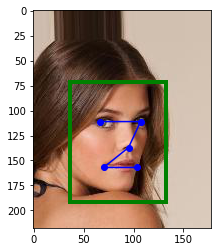

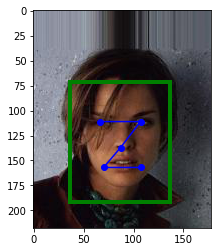

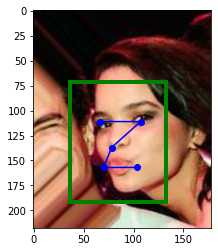

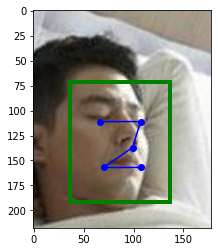

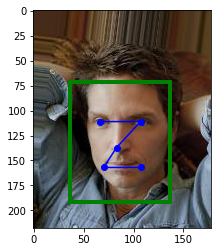

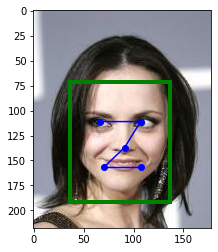

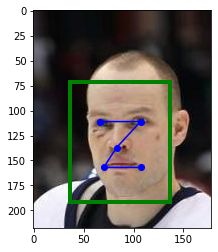

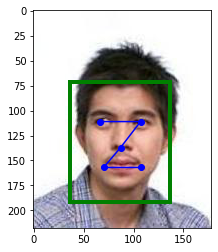

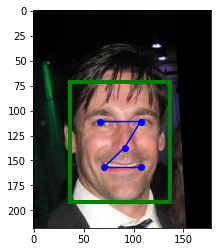

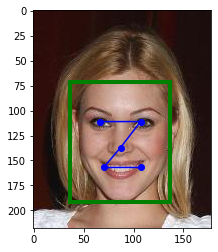

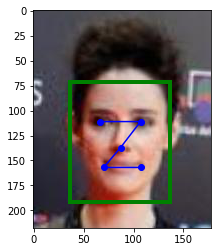

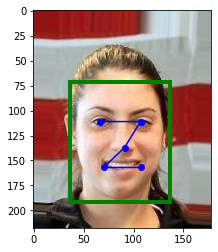

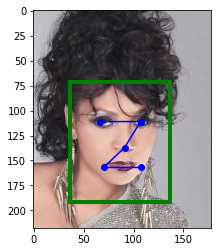

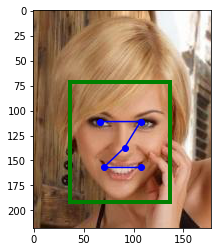

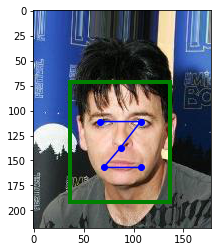

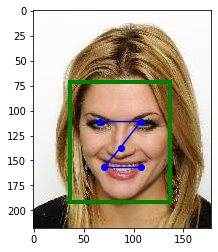

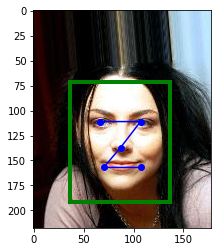

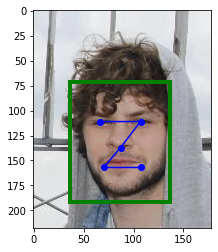

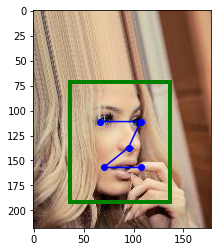

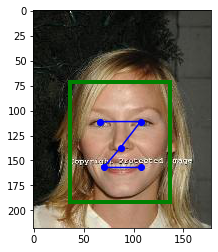

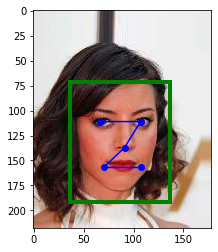

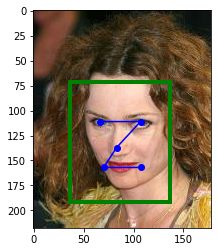

In [6]:
# test the model on 60 images
for index in range(60):
    test_image_with_box_plot(index+1)

>**As we can see that the model performance on the 60 test images is very good**